In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import time
import cv2 as cv
import numpy as np
import scipy.io
from fastai.vision import *
from fastai import *

In [ ]:
learn = load_learner('/home/jupyter/ai-for-sea/data/', file='export-rn101_train_60e.pkl', test= ImageList.from_csv('//home//jupyter//ai-for-sea//data//','test_labels.csv',folder='//test'))
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [4]:
a=preds;a.shape

torch.Size([8041, 196])

In [5]:
labels = scipy.io.loadmat('//home//jupyter//ai-for-sea//data//cars_test_annos_withlabels.mat')

In [6]:
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape #labels in range [0..195]
b = torch.from_numpy(b)

In [7]:
acc=accuracy(a,b);acc

tensor(0.9124)

In [8]:
learn.TTA??

In [9]:
a

tensor([[3.2143e-06, 3.2060e-06, 1.2702e-06,  ..., 4.1256e-06, 5.6095e-07,
         7.2811e-06],
        [2.4296e-07, 2.0501e-10, 2.8516e-07,  ..., 9.4404e-09, 6.0788e-11,
         3.7893e-06],
        [2.1845e-08, 3.6484e-11, 9.0069e-10,  ..., 2.4676e-07, 7.0147e-06,
         9.1904e-09],
        ...,
        [1.6788e-06, 6.3927e-07, 8.6776e-08,  ..., 1.1237e-03, 3.3902e-05,
         7.6825e-08],
        [5.4653e-05, 6.8602e-08, 3.0845e-06,  ..., 8.5968e-09, 1.4824e-08,
         3.4233e-06],
        [7.6109e-08, 5.7591e-10, 2.7083e-09,  ..., 4.9076e-10, 3.5591e-07,
         4.9517e-06]])

In [10]:
y

tensor([0, 0, 0,  ..., 0, 0, 0])

In [11]:
os.path.join('data/test', '%05d.jpg' % (0 + 1))

'data/test/00001.jpg'

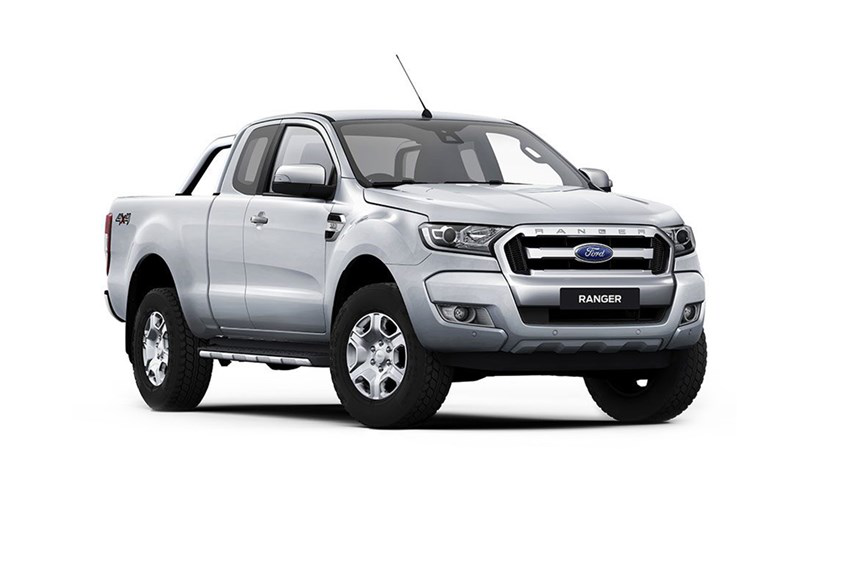

In [17]:
# filename = os.path.join('data/test', '%05d.jpg' % (0 + 1))
# bgr_img = cv.imread(filename)
# rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
# rgb_img = np.expand_dims(rgb_img, 0)
# pred_class = learn.predict(rgb_img)
img = open_image(os.path.join('data', 'Ford-Ranger-XLT-4x4-SuperCabUtility-2018-1-(1).jpg'))
img

In [18]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, pred_idx.item()

(Category 0100, 99)

In [14]:
learn.predict??

In [11]:
def write_prediction(num_samples):
    start = time.time()
    out = open('result-rn152-dlr-e50.txt', 'a')
    for i in range(num_samples):
        filename = os.path.join('data/test', '%05d.jpg' % (i + 1))
        img = open_image(filename)
        pred_class,pred_idx,outputs = learn.predict(img)
        class_id = int(repr(pred_class).split(' ')[1])
        out.write('{}\n'.format(str(class_id)))

    end = time.time()
    seconds = end - start
    print('avg fps: {}'.format(str(num_samples / seconds)))

    out.close()

In [12]:
write_prediction(8041)

avg fps: 40.156343833023186
